# Additional Exercises

Alberto Quaini - I thank Natasha and Rebeka for helping jumping some hurdles.

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 7

In [4]:
indi = pd.read_csv('indi.csv', parse_dates=True, index_col='DATE')
pitt = pd.read_csv('pitt.csv', parse_dates=True, index_col='DATE')
chic = pd.read_csv('chic.csv', parse_dates=True, index_col='DATE')
wash = pd.read_csv('wash.csv', parse_dates=True, index_col='DATE')
miam = pd.read_csv('miam.csv', parse_dates=True, index_col='DATE')

In [35]:
ric = pd.concat([indi, pitt, chic, wash, miam]).sort_index()
ric['date'] = ric.index.copy()
ric['color'] = 'black'
ric.loc[(ric.index == '1975/01/22') | (ric.index == '1988/07/14'), 'color'] = 'yellow'
ric.loc[(ric.index >= '2006/06/03') & (ric.index <= '2016/10/31'), 'color'] = 'maroon'
ric.index = ric.index.dayofyear

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


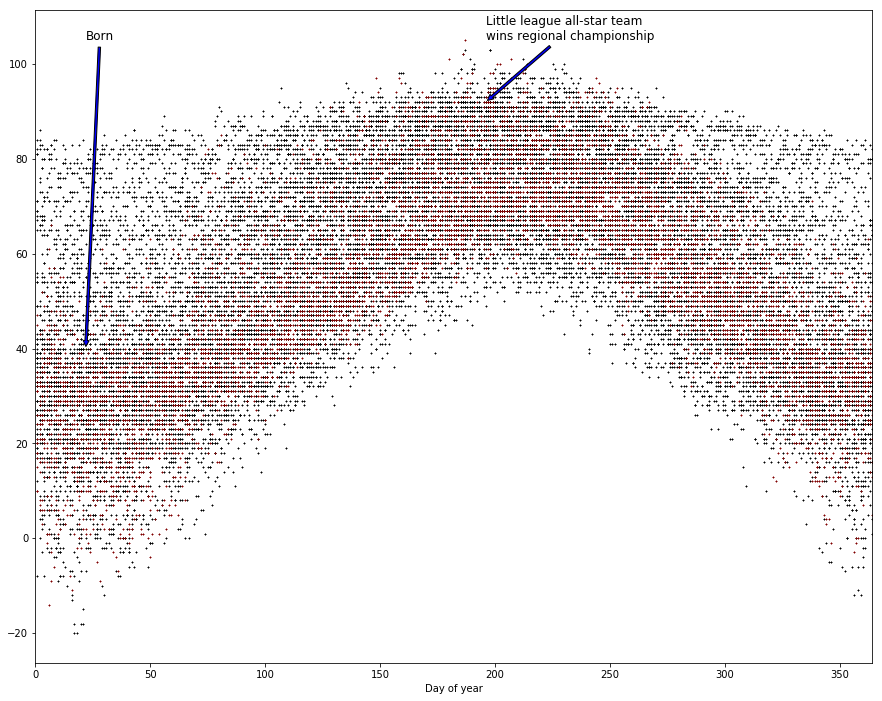

In [36]:
fig, ax = plt.subplots()

for c in ric.color.unique():
    ric[ric.color == c].plot(y=['TMAX', 'TMIN'], marker='+', 
                               linestyle='', 
                               markersize=1.2, figsize=(15, 12), 
                               color=c, ax=ax,
                               legend=False)
    
ric_yellow = ric[ric.color == 'yellow']
event_descriptions = ['Born', 'Little league all-star team \nwins regional championship']
for i in range(len(ric_events)):
    x = ric_yellow.iloc[i].date.dayofyear
    y = ric_yellow.iloc[i].TMAX
    ax.annotate(event_descriptions[i], (x, y), xytext=(x, y_arrow), size=12,
                arrowprops=dict(facecolor='b', arrowstyle="simple"))

ax.set_xlim(0, 364)
ax.set_xlabel('Day of year')
plt.show()

## Exercise 8

In [48]:
lipids = pd.read_csv('lipids.csv', skiprows=4)
lipids = lipids[lipids['diseased'] == 1]
lipids.head()

,diseased,chol,trig
51,1,184,145
52,1,263,142
53,1,185,115
54,1,271,128
55,1,173,56


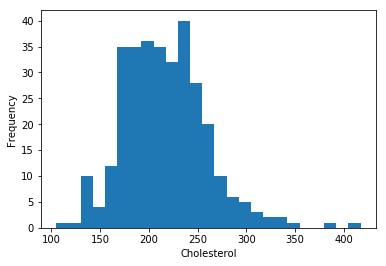

Midpoint of bin with highest frequency:  236.04


In [49]:
fig, ax = plt.subplots()
counts, bins, _ = plt.hist(lipids["chol"], bins=25)
plt.xlabel("Cholesterol")
plt.ylabel("Frequency")
plt.show()
plt.savefig('images/chol_hist.png')

midpoint = bins[[counts.argmax(), counts.argmax() + 1]].mean()
print("Midpoint of bin with highest frequency: ", round(midpoint, 4))

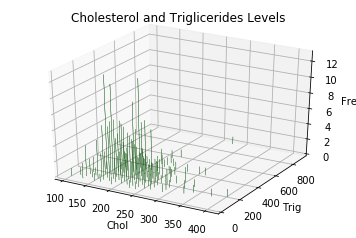

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xs, ys = np.histogram2d(lipids['chol'], lipids['trig'], bins=25)

xpos, ypos = np.meshgrid(xs[:-1] + 0.3, ys[:-1] + 0.3)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
zpos = np.zeros_like(xpos)

dx = 0.5 * np.ones_like(zpos)
dy = dx.copy()
dz = hist.flatten()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='g')

ax.set_xlabel('Chol')
ax.set_ylabel('Trig')
ax.set_zlabel('Freq')

plt.title('Cholesterol and Triglicerides Levels')
plt.savefig('images/chol_3d_hist.png')
plt.show()

plt.show()


It seems that cholesterol and trigliceride are correlated and people with cholesterol $>= 150$ and trigliceride $>= 200$ are likely to haave heart disease.

## Exercise 9

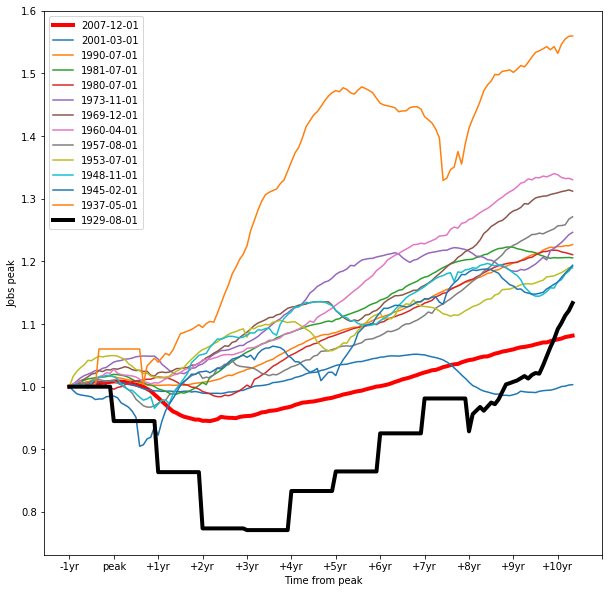

In [46]:
payems = pd.read_csv("payems.csv")
payems['PAYEMS'] = payems['PAYEMS'] * 1000
payems['DATE'] = pd.to_datetime(payems['DATE'])
payems.iloc[:358,0] = payems.iloc[:358,0] - pd.DateOffset(years=100)
payems = payems.set_index('DATE')

recStart = np.array(['2007-12-01', 
                     '2001-03-01', 
                     '1990-07-01', 
                     '1981-07-01', 
                     '1980-07-01', 
                     '1973-11-01', 
                     '1969-12-01', 
                     '1960-04-01',
                     '1957-08-01', 
                     '1953-07-01', 
                     '1948-11-01', 
                     '1945-02-01',
                     '1937-07-01', 
                     '1929-07-01'], 
                    dtype ='datetime64')

# Add extra data for missing months
for i in range(9):
    payems = payems.append([payems.iloc[i]]*11)
payems = payems.sort_index(axis=0)

jobGrowth = np.empty((14,137))
startid = []
# Get the index of the start of each recessiong
for ii in range(12):
    startid.append(payems.index.get_loc(recStart[ii]))
    
startid.append(100)
startid.append(12)

for ii in range(14):
    jobGrowth[ii] = list(payems.iloc[startid[ii]-12:startid[ii]+125, 0])
        
# Normalize each of the 14 series such that the jobs level at the peak date equals 1.
row_start = jobGrowth[:,0]
jobGrowth = jobGrowth / row_start[:,None]

# Plot each of the 14 series as a line plot (with no markers) on the same axes with 
# the peak jobs level of 1 on top of each other for each series.
fig, ax = plt.subplots(figsize = (10,10))
for ii in range(14):
    if ii == 0:
        plt.plot(jobGrowth[ii], 'r', lw=4, label=recStart[ii])
    elif ii == 12:
        plt.plot(jobGrowth[ii], label='1937-05-01')
    elif ii == 13:
        plt.plot(jobGrowth[ii], 'k', lw=4, label='1929-08-01')
    else:
        plt.plot(jobGrowth[ii], label=recStart[ii])
        
ax.legend(loc='upper left')
plt.ylabel("Jobs peak")
plt.xlabel("Time from peak")
plt.xticks(np.arange(0, 145, 12), labels)

x = np.linspace(0, 145, 144)
plt.show()
